<sub>AIST1110 Introduction to Computing Using Python<br/>
2022-23 Term 1 Department of Computer Science and Engineering, The Chinese University of Hong Kong</sub>

# **Assignment 3**

Instructions:
1. You may define extra functions if you see fit for solving any question.
2. Remember to disable or remove testing/debugging code before submission.
3. Unless specified otherwise in the question, don't use other third-party packages that can easily solve the problems apart from the necessary packages like NumPy, SciPy, Pandas, and Matplotlib.

In [1]:
# set backend to inline 
# back up default settings
%matplotlib inline
import matplotlib as mpl
inline_rc = dict(mpl.rcParams)

## **Question 1 - A Decorator of Recursive Functions (18%)**

Suppose that we have some recursive functions for n >= 0 like these:
```python
def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n-1)
```
```python
def fib(n):
    if n < 2: # base case: n = 0 or 1
        return n
    return fib(n-1) + fib(n-2)
```
It could be hard for beginners to understand how recursion works. Showing the full trace of function calls happened behind the scene could be helpful then. If we want to trace all the calls to the `fib` function, we can write a ***higher order function (a decorator)*** named `trace()` to return a new function, which prints information like the name of the function being called, argument(s) received and the return value(s) whenever the `fib` function is called.

To make the output more readable, the `trace()` function should indent the output at each level of function call, and it should support an arbitrary number of arguments. No need to test the program for too many arguments or too big problem sizes. A handful of arguments and n <= 10 are already enough or else your output could not be shown properly to the screen.

**Sample Runs**

```python
factorial = trace(factorial)
print(factorial(4))
```
This code is expected to generate the following output to the console:
```
|-> factorial 4
|   |-> factorial 3
|   |   |-> factorial 2
|   |   |   |-> factorial 1
|   |   |   |   |-> factorial 0
|   |   |   |   |   |<- return 1
|   |   |   |   |<- return 1
|   |   |   |<- return 2
|   |   |<- return 6
|   |<- return 24
24
```

Another way or syntactic sugar to use the trace() function is to use the function decorator syntax as follows:

```python
@trace
def fib(n):
    if n < 2: # base case: n = 0 or 1
        return n
    return fib(n-1) + fib(n-2)

print(fib(4))
```

This code is expected to generate the following output to the console:
```
|-> fib 4
|   |-> fib 3
|   |   |-> fib 2
|   |   |   |-> fib 1
|   |   |   |   |<- return 1
|   |   |   |-> fib 0
|   |   |   |   |<- return 0
|   |   |   |<- return 1
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |<- return 2
|   |-> fib 2
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |-> fib 0
|   |   |   |<- return 0
|   |   |<- return 1
|   |<- return 3
3
```
(Every line has a newline character at the end and no trailing space.)



In [24]:
# TODO: Add your trace function implementation here
def trace(func):
    trace.depth = 0
    def f(*args):
        into = '|-> '
        outo = '|<- '
        space = '|   '
        print((space * trace.depth) + into, end='')
        trace.depth += 1
        print(func.__name__, end=' ')
        for i in args:
            print(i, end=' ')
        print()
        out = func(*args)
        print(space * trace.depth + outo, end = '')
        trace.depth -= 1
        print(f"return {out}")
        return out
    return f

Some testing code snippets are provided below. Feel free to add more code cells yourself for further testing.

In [3]:
@trace
def factorial(n):
    if n == 0:
        return 1
    return n * factorial(n-1)

In [20]:
print(factorial(7))

|-> factorial 7
|   |-> factorial 6
|   |   |-> factorial 5
|   |   |   |-> factorial 4
|   |   |   |   |-> factorial 3
|   |   |   |   |   |-> factorial 2
|   |   |   |   |   |   |-> factorial 1
|   |   |   |   |   |   |   |-> factorial 0
|   |   |   |   |   |   |   |   |<- return 1
|   |   |   |   |   |   |   |<- return 1
|   |   |   |   |   |   |<- return 2
|   |   |   |   |   |<- return 6
|   |   |   |   |<- return 24
|   |   |   |<- return 120
|   |   |<- return 720
|   |<- return 5040
5040


In [7]:
@trace
def fib(n):
    if n < 2: # base case: n = 0 or 1
        return n
    return fib(n-1) + fib(n-2)

In [21]:
print(fib(4))

|-> fib 4
|   |-> fib 3
|   |   |-> fib 2
|   |   |   |-> fib 1
|   |   |   |   |<- return 1
|   |   |   |-> fib 0
|   |   |   |   |<- return 0
|   |   |   |<- return 1
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |<- return 2
|   |-> fib 2
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |-> fib 0
|   |   |   |<- return 0
|   |   |<- return 1
|   |<- return 3
3


In [17]:
print([fib(i) for i in range(5)])

|-> fib 0
|   |<- return 0
|-> fib 1
|   |<- return 1
|-> fib 2
|   |-> fib 1
|   |   |<- return 1
|   |-> fib 0
|   |   |<- return 0
|   |<- return 1
|-> fib 3
|   |-> fib 2
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |-> fib 0
|   |   |   |<- return 0
|   |   |<- return 1
|   |-> fib 1
|   |   |<- return 1
|   |<- return 2
|-> fib 4
|   |-> fib 3
|   |   |-> fib 2
|   |   |   |-> fib 1
|   |   |   |   |<- return 1
|   |   |   |-> fib 0
|   |   |   |   |<- return 0
|   |   |   |<- return 1
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |<- return 2
|   |-> fib 2
|   |   |-> fib 1
|   |   |   |<- return 1
|   |   |-> fib 0
|   |   |   |<- return 0
|   |   |<- return 1
|   |<- return 3
[0, 1, 1, 2, 3]


In [25]:
@trace
def partitions(n, m):
    """Count the ways to partition n using parts up to m, (m <= n)."""
    if n == m:
        return 1 + partitions(n, m-1)
    elif m == 0 or n < 0:
        return 0
    elif n == 0 or m == 1:
        return 1
    else:
        return partitions(n, m-1) + partitions(n-m, m)

In [26]:
print(partitions(4, 3))

|-> partitions 4 3 
|   |-> partitions 4 2 
|   |   |-> partitions 4 1 
|   |   |   |<- return 1
|   |   |-> partitions 2 2 
|   |   |   |-> partitions 2 1 
|   |   |   |   |<- return 1
|   |   |   |<- return 2
|   |   |<- return 3
|   |-> partitions 1 3 
|   |   |-> partitions 1 2 
|   |   |   |-> partitions 1 1 
|   |   |   |   |-> partitions 1 0 
|   |   |   |   |   |<- return 0
|   |   |   |   |<- return 1
|   |   |   |-> partitions -1 2 
|   |   |   |   |<- return 0
|   |   |   |<- return 1
|   |   |-> partitions -2 3 
|   |   |   |<- return 0
|   |   |<- return 1
|   |<- return 4
4


## **Question 2 - Simple Charting (8%)**
Plot the following chart using Matplotlib. Use 50 evenly spaced samples between $-\pi$ and $\pi$, inclusively, as the $x$ values. The chart uses the "ggplot" style. You may need to find out how to set the style of a plot.

The exact figure size is not important as long as the plot is clear enough; you may try figsize=(10, 8).

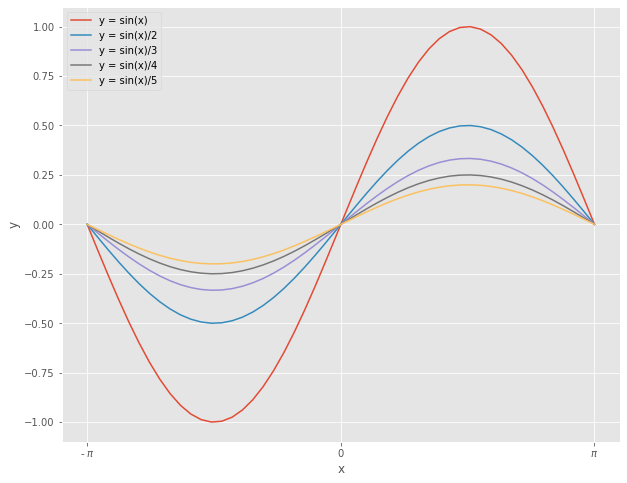

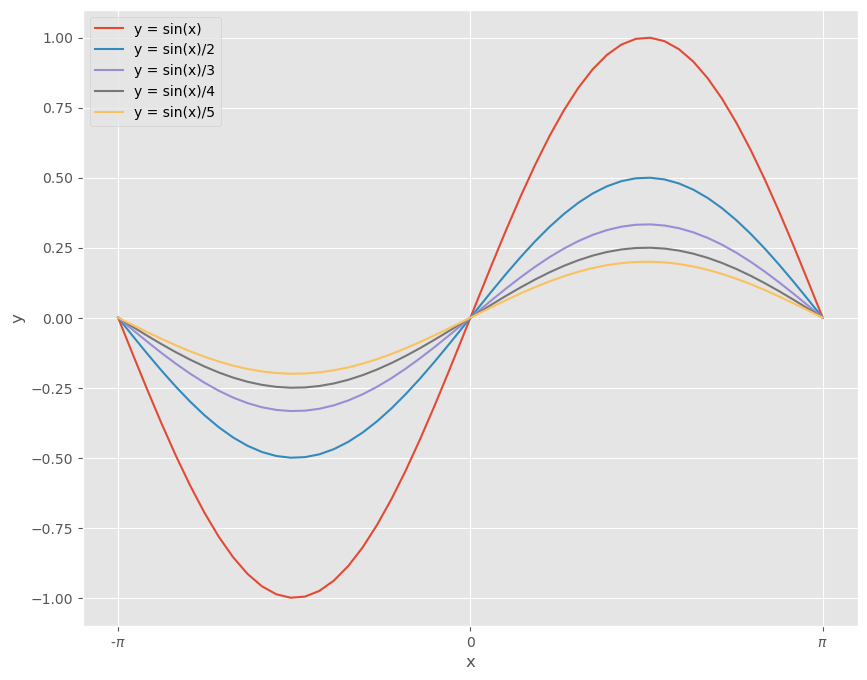

In [29]:
# TODO: Your plotting code here
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10,8))
x = np.linspace((-1)*np.pi, np.pi, 50)
for i in range(1,6):
    temp = np.sin(x) / i
    plt.plot(x,temp, label=f'y = sin(x)' if i == 1 else f'y = sin(x)/{i}')
plt.legend(loc="upper left")
#ax.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: f'{val/np.pi}$\pi$' if val !=0 else '0'))
#ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.set_xticks([(-1) * np.pi, 0, np.pi], labels=['-$\pi$', '0', '$\pi$'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## **Question 3 - Image Processing Using NumPy (39%)**
In this question, we will experiment basic image processing using NumPy and Pillow. Let's use the Pillow package to load an image as a NumPy array, and manipulate the array to achieve some visual effects on the image. First, make sure Pillow has been installed by executing the following cell, if necessary.

In [1]:
!pip install pillow

Import the required libraries:

In [5]:
# reset Matplotlib style to default
import warnings

warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
mpl.rcParams.update(inline_rc)

NameError: name 'inline_rc' is not defined

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

You will need to open some image files on the underlying file system. If you are using Google Colab, you can upload the images onto your Colab session using the "folder" icon on the left sidebar, or executing the following cell and select the files to upload from your local file system (note: the former is the preferred method; for the latter, run it on the Google Chrome browser, running on other browsers may see some error).

In [ ]:
def upload_files():
    from google.colab import files
    uploaded = files.upload()
    for k, v in uploaded.items():
        open(k, 'wb').write(v)
    return list(uploaded.keys())
upload_files()

**Part (a): Color Histogram (24%)**

i) A *color histogram* is a representation of the distribution of colors in an image. In digital imaging, it counts the number of pixels that have colors in each of a fixed list of color ranges, that span the image's color space, the set of all possible colors (see [Wikipedia](https://en.wikipedia.org/wiki/Color_histogram)).

Write a function `color_hist(image, image_name="a given image", show_total=True, bins=256, min=0, max=256, ax=None)` which accepts a numpy array `image` (`dtype`: `uint8`) representing a 2-D multichannel image as argument and plots a histogram with 256 bins (default) showing the count of pixels containing each of the possible red, blue and green colors against the color intensity values. There are up to four series, namely "Total", "Red Channel", "Green Channel" and "Blue Channel" on the chart, where "Total" refers to the total count of all pixels containing the specific color intensity value. Specify `'best'` for the location (`loc`) of the legend on the chart. 

Use the predefined named colors `gold`, `red`, `green` and `blue` for the four series. Since the bars in the historgram may overlap, set the alpha blending value (the `alpha` parameter) of the red, green and blue series to 0.5 to make them semi-transparent for better visibility.

There are some optional parameters to handle:
- `image_name` (default: `"a given image"`): set the chart title to "Color histogram of `image_name`".
- `show_total` (default `True`): show the "Total" series only if the `show_total` argument is true.
- `bins` (default 256): specify the number of equal-width bins for grouping values.
- `min` and `max` (default 0 and 256, respectively): they are used cap the bins range. Lower and upper outliers are ignored. (Hint: you may use the `range` parameter of Matplotlib's `hist` or NumPy's `historgram` in your implementation.)
- `ax` (default `None`): `ax` is a `matplotlib.axes.Axes` object. If `ax` is `None`, create a new figure with figsize=(8, 6) containing a single subplot to plot the histogram. Otherwise, plot the histogram on the Axes passed from the caller.

In [ ]:
# TODO: Your code here

ii) Then plot the color histograms using the developed function for the following sample images: `lenna.jpg`, `baboon.png` and `flower.jpg`.

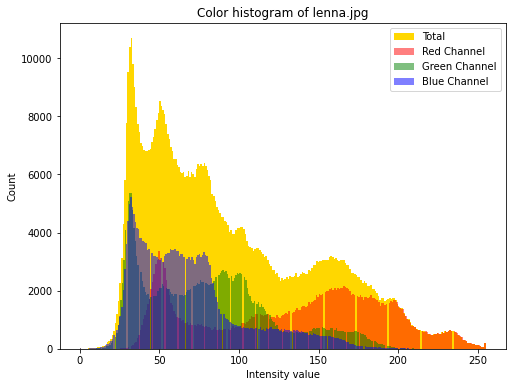

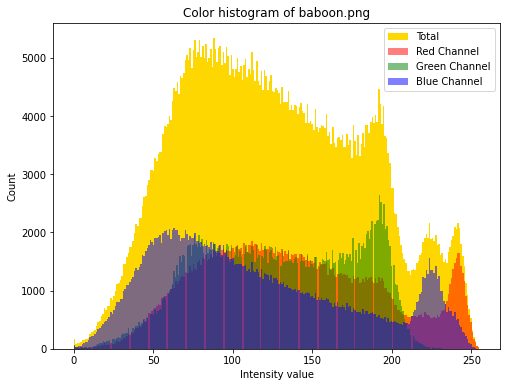

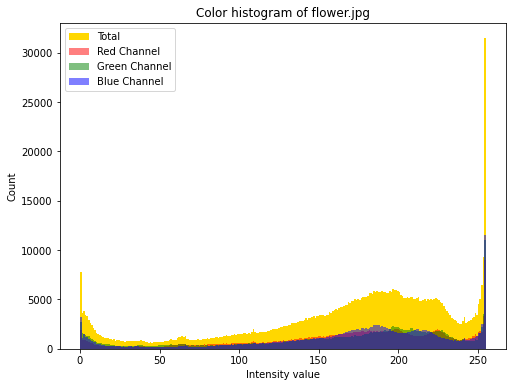

In [ ]:
# TODO: Your code here

iii) Create the following figure with 6 subplots arranged in 3 rows and 2 columns as shown. The exact figure size is not important as long as it is big enough to show all the subplots clearly. You may try figsize=(13, 17) if you have no ideas.

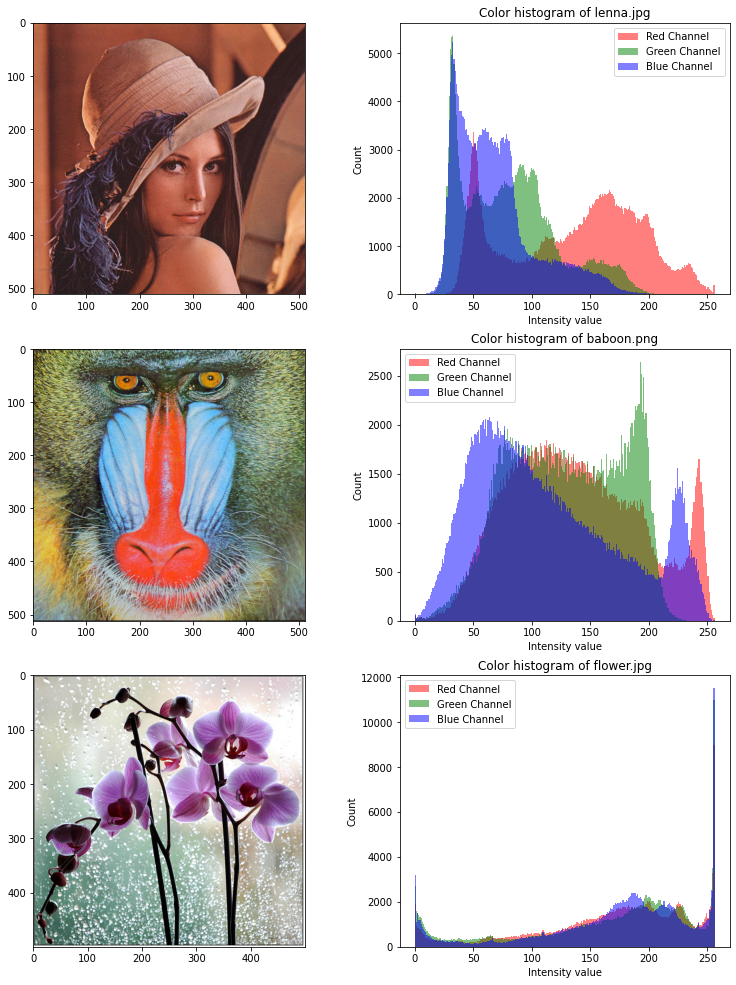

In [ ]:
# TODO: Your code here

**Part (b): Color Replacement (15%)**

i) Write a function `turn_blue(image)` which accepts a numpy array `image` (`dtype`: `uint8`) representing a 2-D multichannel image as argument performs the following tasks on `image` for all those pixels whose red-channel values are greater than both their green and blue channels by 50:
- decrease their red-channel values by 100, 
- increase their green-channel values by 180, 
- increase their blue-channel values by 200.

If the subtraction results in a negative value or the addition results in a value greater than 255, cap the new value to be within [0, 255].

The function returns a numpy array (`dtype`: `uint8`) representing the modified image.

In [ ]:
# TODO: Your code here

ii) Load the image `red_rose.jpg` as a NumPy array, call the `turn_blue()` function on the loaded array, and save the array returned from the function as an image file named `blue_rose.jpg` using Pillow.

In [ ]:
# TODO: Your code here

iii) Create the following figure with 4 subplots arranged in 2 rows and 2 columns as shown using `red_rose.jpg` and `blue_rose.jpg`. The exact figure size is not important as long as it is big enough to show all the subplots clearly. You may try figsize=(15, 12) if you have no ideas. Set `bins` as 250, `min` as 1 and `max` as 251 to cap the bins range for a clearer histogram.

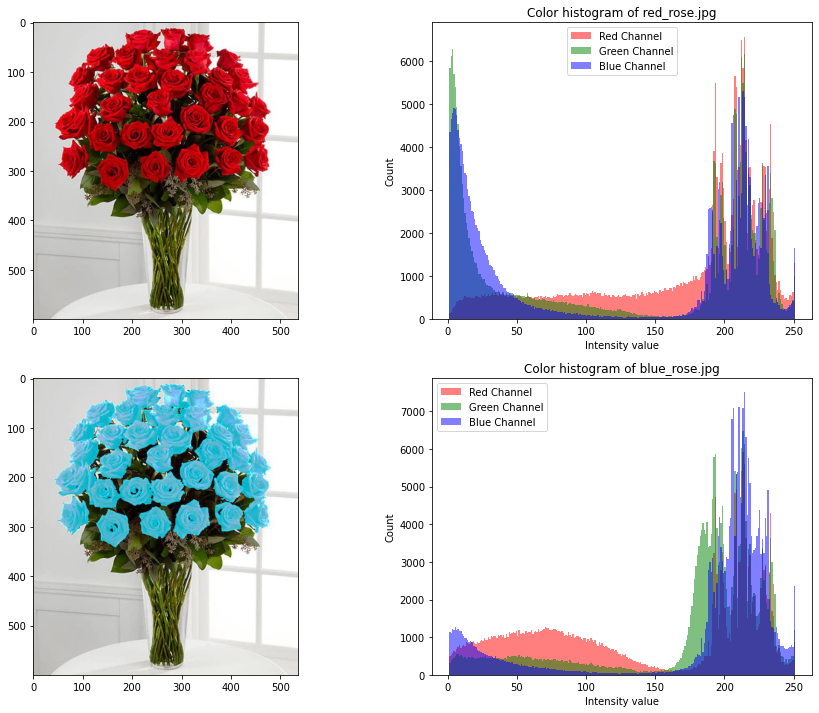

In [ ]:
# TODO: Your code here

## **Question 4 - COVID Data Analysis (35%)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

**Part (a): Infection and Fatality Rate (15%)**

Use Pandas to read the file `enhanced_sur_covid_19_eng.csv` which contains data on confirmed cases of COVID-19 infection in Hong Kong between Jan 23, 2020 and Feb 6, 2022.

Plot the following histogram which shows the distribution of infection cases and deceased cases for male and female (two series) across different age groups (x-axis). 

In the loaded dataframe,
- only columns `[0, 1, 3, 4, 6, 8, 9]` are useful to us.
- you may rename them as `['Case', 'Date', 'Gender', 'Age', 'Severity', 'Classification', 'Status']` if you find it more convenient for processing.

Before plotting, some data cleaning is needed:
- We use records with `Status` = 'Confirmed' only. 
- Some records contain the value 'Pending' in the `Age` and `Gender` columns. They should be dropped.
- Some records have the value `<1` in the `Age` column. They should be replaced by 0.
- You may need to convert the Age column to numeric values.

For good visualization, let's set bins = 10 and rwidth = 0.8 (which put some gap between the bars) for the histogram.

You may define some helper function(s) to facilitate the implementation if necessary.

Hints: 
- `pd.to_numeric()` can help convert a column to numeric values.
- You may use the `groupby` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) to group the data by `Gender`, and then get two groups (via the `get_group()` method), one contains age values of all male records and another of all female records. Then you may make a list or tuple of 4 series containing age data of survived males, deceased males, survived females and deceased females by querying the `Severity` column (check if it equals the word 'Deceased'). Finally, call `hist()` passing that list or tuple to plot the 4 series.
- A reference [article](https://towardsdatascience.com/5-pandas-group-by-tricks-you-should-know-in-python-f53246c92c94) introducing the use of `groupby()` could be useful.   
- You may also refer to the stacked bar subplot in this [example](https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html) to see how to make the series data points stacked in the chart.

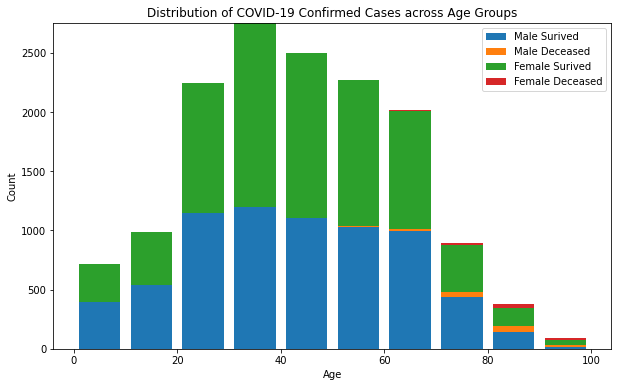

In [ ]:
# TODO: Your code here

**Part (b): Vaccination Rate (10%)**

Use Pandas to read the file `vaccination-rates-over-time-by-age.csv` which contains data on COVID-19 vaccination records in Hong Kong between Feb 22, 2021 and Nov 6, 2022.

Plot the following chart which shows the vaccination rate variations over time for three series of different age groups. 

In the loaded dataframe,
- only columns `[0-6 and 9-12]` are useful to us.
- you may rename them as `['Date', 'AgeGroup', 'Sex', 'S1D', 'S2D', 'S3D', 'S4D', 'B1D', 'B2D', 'B3D', 'B4D']` if you find it more convenient for processing.

In other words, we care only the first 4 doses of each type of vaccine and ignore the 5th and 6th doses which are basically empty columns. And we don't care which type of vaccine (Sinovac or BioNTech) the person chose. So, we are going to plot the sum of the numbers for all the `'S1D', 'S2D', 'S3D', 'S4D', 'B1D', 'B2D', 'B3D', 'B4D'` columns against the `Date` column.

For simplicity and good visibility, we will plot only three series for the following age groups:
1. `'0-11'`: children
2. `'40-49'`: middle-aged
3. `'70-79'`: the elderly

The upper subplot uses circles as markers. Perhaps some would find it seem hard to visualize well. So, you are to provide the lower subsplot which plots the 14-day simple moving average (SMA) lines of the 3 series.

The exact figure size is not important; you may use figsize=(11, 11) if you see fit.

You may define some helper function(s) to facilitate the implementation if necessary.

Hints: 
- `pd.to_datetime()` can help convert the `Date` column to datetime values. Then you can set the `Date` column as the index to let Matplotlib handle the x-ticks automatically. 

- Again, you may make use of the `groupby` function. This time, we group data by `AgeGroup`. For each group, we plot the `Total` column against `Date` which is already the index if you follow our suggestion.

- Pandas provides a `rolling(window)` method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)) which can greatly simplify the task of plotting the moving average.

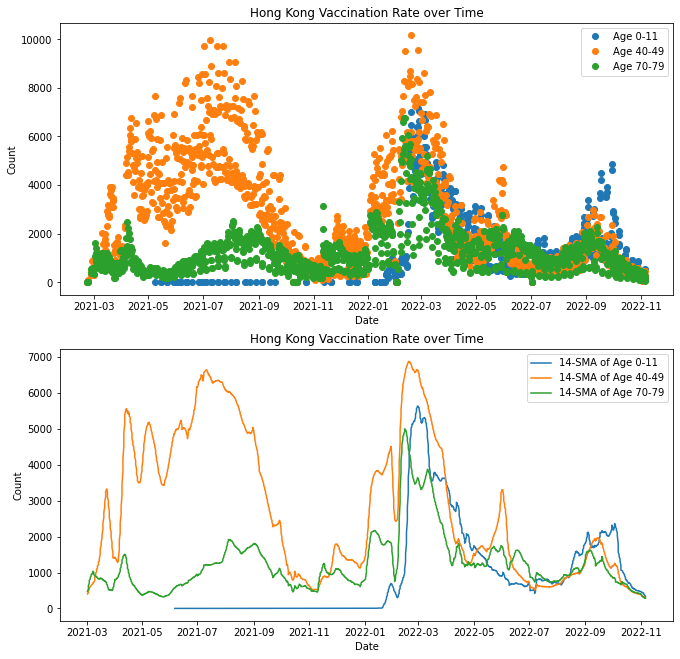

In [ ]:
# TODO: Your code here